In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 22,15
rcParams['xtick.labelsize'] = 54
rcParams['ytick.labelsize'] = 54
import numpy as np
import os 
my_path = os.path.abspath('/Users/juan/Desktop/Git/3level/DATA/PAPER_DATA')
my_path1 = os.path.abspath('/Users/juan/Desktop/3level_img/')



In [9]:
class variables():
    def __init__(self):
         #eigen energies
        self.w10 = 20
        self.w2w1 = 1.6
        self.w20 = self.w10*self.w2w1
       
        #carnot efficiency
        self.n_c  =np.arange(1e-6,1,0.02)
        #temperatures
        self.b_l  = 1/np.array([250,50,25])[1] 
        self.b_h  = (1-self.n_c)*self.b_l
       #Instantaneous eigen energies
        self.l = np.linspace(0,np.sqrt(self.w20*self.w10),80)
        self.e_20 = ((self.w20+self.w10)/2 + np.sqrt(((self.w20-self.w10)/2 )**2 +(self.l)**2  ))
        self.e_10 = ((self.w20+self.w10)/2 - np.sqrt(((self.w20-self.w10)/2 )**2 +(self.l)**2  ))
       #lindblad constants
        self.g_l10  = 100
        self.g_h10 =  self.g_l10
        self.g_h20  = self.g_l10*5
        self.g_l20 = self.g_h20
       
        #Angle dependent variables 
        self.c    = (self.w20 -self.w10 )/(2*np.sqrt(((self.w20-self.w10)/2 )**2 +(self.l)**2))
        self.s    = (2*self.l )/(self.e_20-self.e_10)
        #power variables
    def g1(self):
        return 1/2*(self.g_l10*(1+self.c) + self.g_h10*(1-self.c))
    def g2(self):
        return 1/2*(self.g_l20*(1-self.c) + self.g_h20*(1+self.c)) 
    def g1m(self):
        result=[]
        for value in range(len(self.b_h)):
            result.append(1/2*(self.g_l10*(1+self.c)*np.exp(-self.b_l*self.e_10)\
                        + self.g_h10*(1-self.c)*np.exp(-self.b_h[value]*self.e_10)))
        return result
    def g2m(self):
        result=[]
        for value in range(len(self.b_h)):
            result.append(1/2*(self.g_l20*(1-self.c)*np.exp(-self.b_l*self.e_20) \
                        + self.g_h20*(1+self.c)*np.exp(-self.b_h[value]*self.e_20)))
        return result

    def omega(self):
        return ((self.e_20-self.e_10)**2 + ( (self.g1()+self.g2())/2)**2)\
                /(self.w20-self.w10)

    def G(self):
        return  1/2*(self.g1()+self.g2())*(1 + (1/(self.e_20-self.e_10)**2)\
                *(1/2*(self.g1()+self.g2()))**2)
    
    def q1(self):
        return (var.g_h10*((1-var.c)/(1+var.c)) )/(var.g_l10+ var.g_h10*((1-var.c)/(1+var.c))) 
    
    def q2(self):
        return (var.g_l20*((1-var.c)/(1+var.c)) )/(var.g_h20+ var.g_l20*((1-var.c)/(1+var.c))) 
         
 #Initialize the object var       

var = variables()




In [10]:
 # Maximized power 
 
def G12(var):
    G = var.G()
    g1= var.g1()
    g2= var.g2()
    q1= var.q1()
    q2= var.q2()
    s = var.s
    om = var.omega()
    return G+(s*om)**2/g1, G+ (s*om)**2/g2
    



 def POWER(var):
    e_20 = var.e_20
    e_10 = var.e_10
    c= var.c
    g2m = var.g2m()
    g1m = var.g1m()
    g2 = var.g2()
    g1 = var.g1()
    omega = var.omega()
    w21 = var.w20- var.w10
    result =[]
    for value in range(len(var.b_h)):
        result.append( (1/2*(e_20-e_10)*(1-c**2)*omega\
                      *( (g2m[value]/g2) - (g1m[value]/g1)))\
                /( (1/2+(g2m[value]/g2))\
               *( ((1-c**2)*omega)/g1\
               +(w21/((e_20-e_10)**2))*(1/2*(g1+g2)))\
               +(1/2+(g1m[value]/g1))\
               * ( ((1-c**2)*omega)/g2 \
               +(w21/((e_20-e_10)**2))*(1/2*(g1+g2)) )\
                ))
    return result


# local coupling efficiency
def n_l(var):
    e_20 = var.e_20
    e_10 = var.e_10
    q1 = var.q1()
    q2 = var.q2()
    return (1- e_10/e_20)/(1- q2 -(e_10/e_20)*q1 )


# <0|rho|0> at maximal frequency
def R0(var):
    e_20 = var.e_20
    e_10 = var.e_10
    c= var.c
    g2m = var.g2m()
    g1m = var.g1m()
    g2 = var.g2()
    g1 = var.g1()
    omega = var.omega()
    w21 = var.w20- var.w10
    result =[]
    for value in range(len(var.b_h)):
        result.append( ( ((1-c**2)*omega)/g1\
               +(w21/((e_20-e_10)**2))*(1/2*(g1+g2)) +\
                ((1-c**2)*omega)/g2 \
               +(w21/((e_20-e_10)**2))*(1/2*(g1+g2)) ) \
                /( (1/2+(g2m[value]/g2))\
               *( ((1-c**2)*omega)/g1\
               +(w21/((e_20-e_10)**2))*(1/2*(g1+g2)))\
               +(1/2+(g1m[value]/g1))\
               * ( ((1-c**2)*omega)/g2 \
               +(w21/((e_20-e_10)**2))*(1/2*(g1+g2)) )\
                ))
    return result


def P0(var):
    e_20 = var.e_20
    e_10 = var.e_10
    q1 = var.q1()
    q2 = var.q2()
    g1 = var.g1()
    g2 = var.g2()
    b_h    = var.b_h
    b_l    = var.b_l
    result = []
    for value in range(len(var.b_h)):
        result.append( e_10*q1*(1-q1)*g1*(np.exp(-b_h[value]*e_10)-np.exp(-b_l*e_10))
                      +e_20*q2*(1-q2)*g2*(np.exp(-b_h[value]*e_20)-np.exp(-b_l*e_20) ))
    return result

 def dP0(var,G1,G2):
    b_h  = var.b_h
    b_c  = var.b_l
    e_10 = var.e_10
    e_20 = var.e_20
    e_21= e_20- e_10
    s    = var.s
    om   = var.omega()
    q1 = var.q1()
    q2 = var.q2()
    g1 = var.g1()
    g2 = var.g2()
    result =[]
    for value in range(len(b_h)):
        result.append(( (e_21*(s*om)**2) /(g1*G1+g2*G2) )*\
                      (g1*q1*(1-q1)*(np.exp(-b_h[value]*e_10)-np.exp(-b_c*e_10) ) \
                      -g2*q2*(1-q2)*(np.exp(-b_h[value]*e_20)-np.exp(-b_c*e_20)) ) )
    return result


In [11]:
# Non-diagonal Currents

def Qnd(var,G1,G2,R0,P,dP0):
    b_h = var.b_h
    q1 = var.q1()
    q2 = var.q2()
    g1 = var.g1()
    g2 = var.g2()
    first_result =[]
    second_result=[]

    for value in range(len(b_h)):
        first_result.append( P[value]*( (g1*(1-q1)*G1+g2*q2*G2)/(g1*G1+g2*G2) )+R0[value]*dP0[value] )
        second_result.append( P[value]*( (g1*q1*G1+g2*(1-q2)*G2)/(g1*G1+g2*G2))+R0[value]*dP0[value] )
    Qnd_c = np.array(first_result)
    Qnd_h = np.array(second_result)
    return Qnd_c, Qnd_h



In [12]:
def Qd(var,G1,G2,R0,P,dP0,P0,n_l):
    b_h = var.b_h
    q1 = var.q1()
    q2 = var.q2()
    g1 = var.g1()
    g2 = var.g2()
    result =[]
    for value in range(len(b_h)):
        result.append(  -(1/n_l - (g1*q1*G1+g2*(1-q2)*G2)/(g1*G1+g2*G2) )*P[value] \
                            -R0[value]*( P0[value]+dP0[value]  ) )
    result1 = np.array(result)    
    return result1, -result1
    

In [13]:
G1, G2 = G12(var)
P      = POWER(var)
R_0    = R0(var)
dP_0   =  dP0(var,G1,G2)
P_0    = P0(var)
nl    = n_l(var)
Q_nd_c, Q_nd_h = Qnd(var,G1,G2,R_0,P,dP_0)
Q_d_c, Q_d_h  = Qd(var,G1,G2,R_0,P,dP_0,P_0,nl)

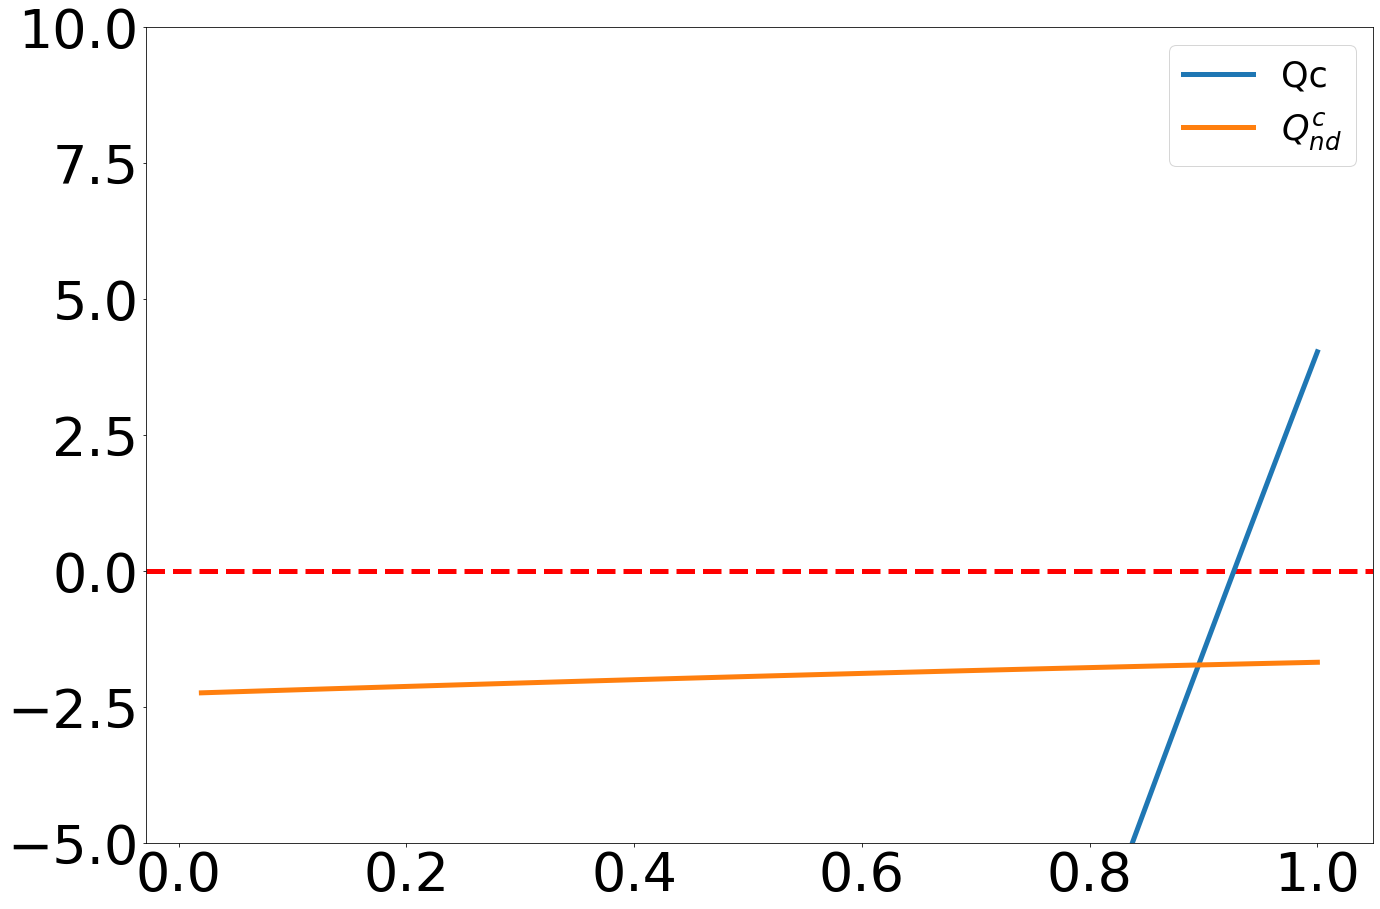

In [17]:
Field = [15]
wd =5
x= var.b_h/var.b_l

plt.axhline(0, color='r', linestyle='--',lw=wd)
for field in Field:
    y1= np.transpose(Q_nd_c)[:][field]/(var.w20-var.w10)
    y2= np.transpose(Q_nd_h)[:][field]/(var.w20-var.w10)
    y3 = np.transpose(Q_d_c)[:][field]/(var.w20-var.w10)
    y4 = np.transpose(Q_d_h)[:][field]/(var.w20-var.w10)
    plt.plot(x, y1+y3, label='Qc',lw= wd)
    plt.plot(x, y1, label=r'$Q_{nd}^c$' ,lw =wd)
plt.ylim(-5,10)
plt.legend(fontsize= 35)

Text(0.5, 0, '$\\beta_h/\\beta_c$')

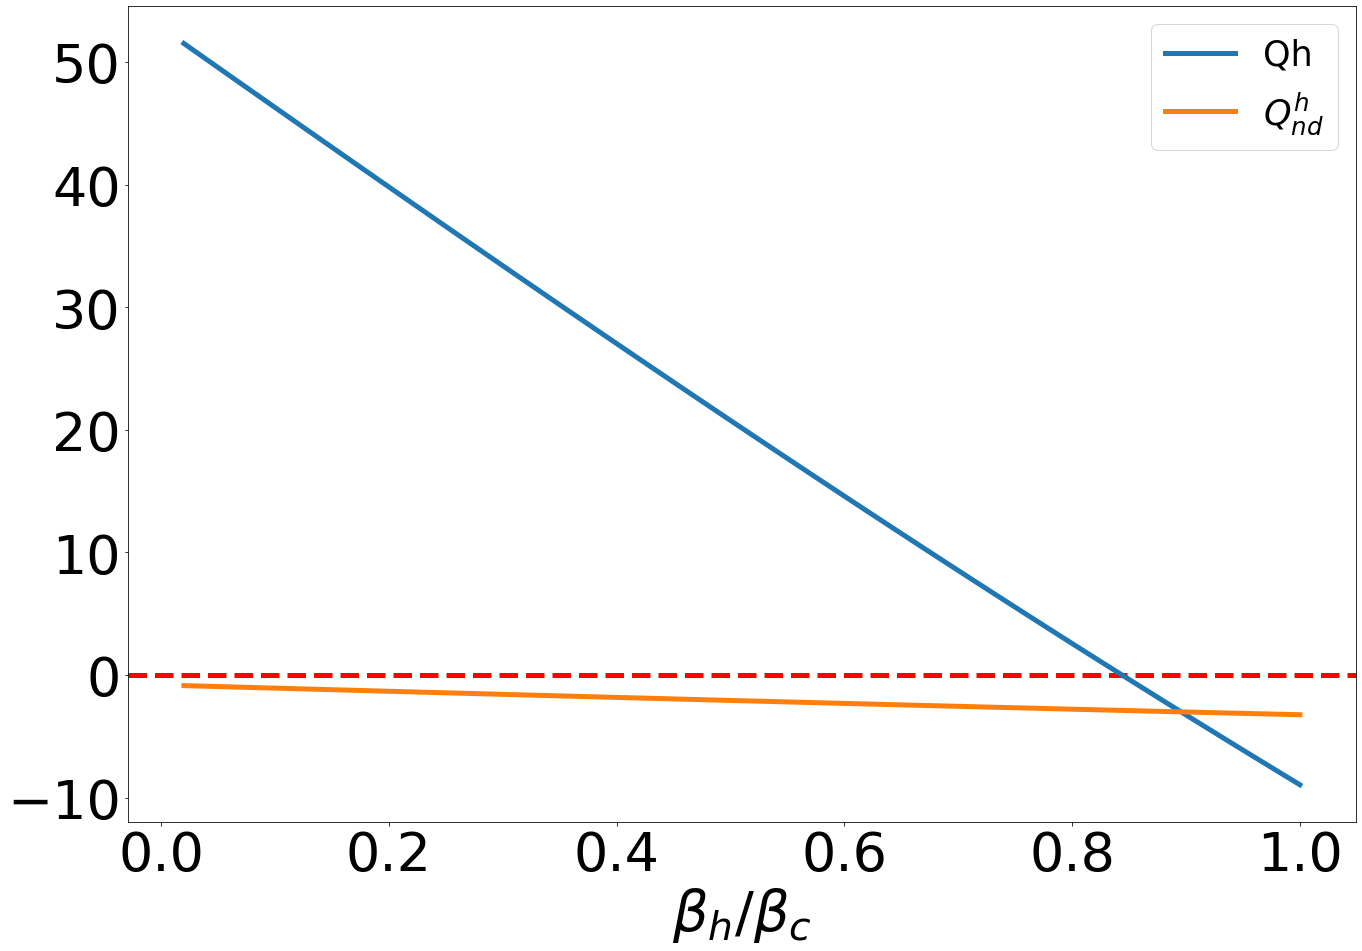

In [22]:
Field = [15]
wd =5
x= var.b_h/var.b_l

plt.axhline(0, color='r', linestyle='--',lw=wd)
for field in Field:
    y1= np.transpose(Q_nd_c)[:][field]/(var.w20-var.w10)
    y2= np.transpose(Q_nd_h)[:][field]/(var.w20-var.w10)
    y3 = np.transpose(Q_d_c)[:][field]/(var.w20-var.w10)
    y4 = np.transpose(Q_d_h)[:][field]/(var.w20-var.w10)
    plt.plot(x, y2+y4, label='Qh',lw= wd)
    plt.plot(x, y2, label=r'$Q_{nd}^h$' ,lw =wd)

plt.legend(fontsize= 35)
plt.xlabel(r'$\beta_h/\beta_c$',fontsize=56)